<a href="https://colab.research.google.com/github/YannickDuport/PhyInf/blob/main/Yannick_Duport_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

Preprocessing includes i) installing Python packages, ii) creating empty directories and iii) cloning git repositories (iv) compiling Seq-Gen and (v) defining universal helper functions

## Install Python Packages

* Biopython
* numpy (version 1.21.1)


In [ ]:
!pip install Biopython
!pip install -U numpy
!pip install -U ray
!pip install -U xarray
#!pip install -U scikit-learn

     |████████████████████████████████| 2.3 MB 3.9 MB/s 
     |████████████████████████████████| 15.7 MB 331 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 57.6 MB 75 kB/s 
     |████████████████████████████████| 173 kB 44.9 MB/s 
     |████████████████████████████████| 845 kB 4.2 MB/s 
  Attempting uninstall: xarray
    Found existing installation: xarray 0.18.2
    Uninstalling xarray-0.18.2:
      Successfully uninstalled xarray-0.18.2


## Create Directory Structure

In [402]:
from pathlib import Path

ROOT_PATH = Path('/content/')
REPO_PATH = ROOT_PATH / "repos"         # contains all git repositories
BASH_PATH = ROOT_PATH / "bash_scripts"  # contains bash-scripts (e.g. for sequence generation)
DATA_PATH = ROOT_PATH / "data"          # contains all data used (models, sequences)
TREE_PATH = DATA_PATH / "trees"         # contains all trees downloaded from RAxMLGrove
SEQ_PATH = DATA_PATH / "sequences"      # contains all sequences, generated from the downloaded trees & models
RESULTS_PATH = ROOT_PATH / "results"    # contains results (plots, etc.)

PATHS = [
  ROOT_PATH,
  REPO_PATH,
  BASH_PATH,
  DATA_PATH,
  TREE_PATH,
  SEQ_PATH,
  RESULTS_PATH
]

for path in PATHS:
  path.mkdir(exist_ok=True)

## Clone Git Repositories

* RAxMLGroveScripts - Download Trees
* Seq-Gen - Generate Sequences
* PhyInf - Personal repository that contains some intermediate files, such as a binary file containing all distance matrices

In [ ]:
!git clone https://github.com/angtft/RAxMLGroveScripts /content/repos/RAxMLGroveScripts
!git clone https://github.com/rambaut/Seq-Gen /content/repos/Seq-Gen
!git clone https://github.com/YannickDuport/PhyInf /content/repos/PhyInf

Cloning into '/content/repos/RAxMLGroveScripts'...
remote: Enumerating objects: 1746, done.
remote: Counting objects: 100% (1746/1746), done.
remote: Compressing objects: 100% (1198/1198), done.
remote: Total 1746 (delta 558), reused 1671 (delta 492), pack-reused 0
Receiving objects: 100% (1746/1746), 66.46 MiB | 4.01 MiB/s, done.
Resolving deltas: 100% (558/558), done.
Cloning into '/content/repos/Seq-Gen'...
remote: Enumerating objects: 200, done.
remote: Total 200 (delta 0), reused 0 (delta 0), pack-reused 200
Receiving objects: 100% (200/200), 173.67 KiB | 1.40 MiB/s, done.
Resolving deltas: 100% (127/127), done.
Cloning into '/content/repos/PhyInf'...
remote: Enumerating objects: 888, done.
remote: Counting objects: 100% (888/888), done.
remote: Compressing objects: 100% (614/614), done.
remote: Total 888 (delta 286), reused 860 (delta 264), pack-reused 0
Receiving objects: 100% (888/888), 6.00 MiB | 9.58 MiB/s, done.
Resolving deltas: 100% (286/286), done.


## Compile Seq-Gen

In [ ]:
!cd /content/repos/Seq-Gen/source; make

cc  -O3 -c seq-gen.c 
seq-gen.c: In function ‘OpenTreeFile’:
seq-gen.c:690:4: warning: ignoring return value of ‘fgets’, declared with attribute warn_unused_result [-Wunused-result]
    fgets(st, 255, stdin);
    ^~~~~~~~~~~~~~~~~~~~~
seq-gen.c: In function ‘ReadFileParams’:
seq-gen.c:584:3: warning: ignoring return value of ‘fgets’, declared with attribute warn_unused_result [-Wunused-result]
   fgets(st, 255, tree_fv);
   ^~~~~~~~~~~~~~~~~~~~~~~
cc  -O3 -c global.c
cc  -O3 -c evolve.c
cc  -O3 -c model.c
cc  -O3 -c nucmodels.c
cc  -O3 -c aamodels.c
cc  -O3 -c eigen.c
eigen.c:38:9: warning: conflicting types for built-in function ‘cexp’ [-Wbuiltin-declaration-mismatch]
 complex cexp (complex a);
         ^~~~
cc  -O3 -c treefile.c
cc  -O3 -c progress.c
cc  -O3 -c gamma.c
cc  -O3 -c twister.c
cc  -O3 -o seq-gen seq-gen.o global.o evolve.o model.o nucmodels.o aamodels.o eigen.o treefile.o progress.o gamma.o twister.o -lm


## Define Helper Functions

In [373]:
import time

###  HELPER FUNCTIONS  ###

def timeit(method):
    """Timing decorator"""

    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()

        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print('{:20}  {:8.4f} [s]'.format(method.__name__, (te - ts)))
        return result

    return timed

In [ ]:
# import shutil
# shutil.rmtree(r'/content/data/')
# DATA_PATH.mkdir(exist_ok=True)
# SEQ_PATH.mkdir(exist_ok=True)

# Download Trees

This section includes i) downloading trees and ii) creating some statistics of the downloaded trees **(currently missing)**.

Trees are being downloaded using the script 'org_script.py', provided by RAxMLGroveScripts.

Trees will be downloaded into: /content/data/trees

Filters used are:
* MODEL = GTR
* DATA_TYPE = DNA
* NUM_TAXA <= 1000
* OVERALL_NUM_PARTITIONS = 1

In [ ]:
!printf 'y\n100' | /content/repos/RAxMLGroveScripts/org_script.py --seed 42 find -q "MODEL = 'GTR' and DATA_TYPE = 'DNA' and OVERALL_NUM_PARTITIONS = '1' and NUM_TAXA <= 1000" -o /content/data/trees

{'TREE_ID': '3183', 'NUM_TAXA': 302, 'TREE_LENGTH': 3.47807, 'TREE_DIAMETER': 1.35388, 'TREE_HEIGHT': 0.982898, 'BRANCH_LENGTH_MEAN': 0.005787130498555144, 'BRANCH_LENGTH_VARIANCE': 0.001493673645549527, 'IS_INDELIBLE_COMPATIBLE': 0, 'OVERALL_NUM_ALIGNMENT_SITES': 560, 'OVERALL_NUM_PATTERNS': 296, 'OVERALL_GAPS': 2.64, 'INVARIANT_SITES': 'None', 'RAXML_NG': 0, 'OVERALL_NUM_PARTITIONS': 1, 'MISSING_DATA_RATE': 'None', 'MODEL': 'GTR', 'ALPHA': 0.283225, 'RATE_AC': 3.685461, 'RATE_AG': 26.846964, 'RATE_AT': 2.341218, 'RATE_CG': 1.779448, 'RATE_CT': 32.821458, 'RATE_GT': 1.0, 'FREQ_A': 0.383854, 'FREQ_C': 0.154459, 'FREQ_G': 0.169654, 'FREQ_T': 0.292034, 'NUM_ALIGNMENT_SITES': 560, 'NUM_PATTERNS': 296, 'GAPS': 2.64, 'DATA_TYPE': 'DNA', 'RATE_STR': 'GTR{3.685461/26.846964/2.341218/1.779448/32.821458/1.0}', 'FREQ_STR': '{0.383854/0.154459/0.169654/0.292034}', 'PARTITION_NUM': 'None', 'STATIONARY_FREQ_STR': 'None', 'PROPORTION_INVARIANT_SITES_STR': 'None', 'AMONG_SITE_RATE_HETEROGENEITY_STR':

In [ ]:
import json

import pandas as pd
import matplotlib.pyplot as plt

from pathlib import PosixPath

def read_tree_stats(path: PosixPath) -> pd.DataFrame :
    """ The methods reads in the json files of each tree, collects some stats 
    and stores them in a pandas data frame 
    """

    # Dictionary to collect all the stats
    stats_dicti = {
        'TREE_ID': [],
        'NUM_TAXA': [], 
        'BRANCH_LENGTH_MEAN': []
    }

    # list all json files containing the tree stats
    tree_files = path.rglob("tree_dict.json")

    # read json files and add some of the stats to the dictionary
    for tree_file in tree_files:
        with tree_file.open('r') as f:
            stats = json.load(f)[0]

            # append stats to the stats dictionary
            for key, values in stats_dicti.items():
                values.append(stats[key])
    
    return pd.DataFrame(stats_dicti)


def plot_tree_stats(df: pd.DataFrame):

    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].hist(df['NUM_TAXA'], density=True, bins=20)
    axes[1].hist(df['BRANCH_LENGTH_MEAN'], density=True, bins=25)
    axes[1].set_yscale('log')
    fig.show()

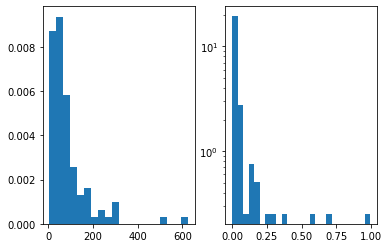

In [ ]:
x = read_tree_stats(TREE_PATH)
plot_tree_stats(x)

# Generate Sequences

In this section we create sequences of size 100, 200, 500, 1000, ... for each model, using Seq-Gen.

For this we create a shell script, which first extracts all necessary information (Model-ID, transition rates, relative base frequencies, ...) from the 'log_0.txt' files, and then runs Seq-Gen, using these parameters

In [ ]:
###  CREATE BASH-SCRIPT TO GENERATE SEQUENCES  ###

# write bash code as a string
sh = """#!/bin/bash

# usage: ./generate_sequences.sh <PATH_TO_DATA> <PATH_TO_OUTDIR> <SEQUENCE_LENGTHS> <PATH_TO_SEQGEN>
# SEQUENCE_LENGTHS should be comma separated. E.g. 10,100,1000
# PATH_TO_SEQGEN is the path to the Seq-Gen repository

PATH_TO_DATA=$1
PATH_TO_OUTDIR=$2
IFS=',' read -ra SEQ_LENGTHS <<< $3
PATH_TO_SEQGEN=$4
MODEL="GTR"
SEED=100

for filename in $PATH_TO_DATA/*/; do

  # Set tree and parameter files
  TREE_ID=$(basename $filename)
  TREE_FILE="${filename}tree_best.newick"
  MODEL_FILE="${filename}log_0.txt"

  # Get model parameters
  while read line; do
    IFS=':' read -ra ADDR <<< $line
      if [[ ${ADDR[0]} == "rate A <-> C" ]]; then
        RATE_A_C=$(echo ${ADDR[1]} | xargs)
      elif [[ ${ADDR[0]} == "rate A <-> G" ]]; then
        RATE_A_G=$(echo ${ADDR[1]} | xargs)
      elif [[ ${ADDR[0]} == "rate A <-> T" ]]; then
        RATE_A_T=$(echo ${ADDR[1]} | xargs)
      elif [[ ${ADDR[0]} == "rate C <-> G" ]]; then
        RATE_C_G=$(echo ${ADDR[1]} | xargs)
      elif [[ ${ADDR[0]} == "rate C <-> T" ]]; then
        RATE_C_T=$(echo ${ADDR[1]} | xargs)
      elif [[ ${ADDR[0]} == "rate G <-> T" ]]; then
        RATE_G_T=$(echo ${ADDR[1]} | xargs)
      elif [[ ${ADDR[0]} == "freq pi(A)" ]]; then
        PI_A=$(echo ${ADDR[1]} | xargs)
      elif [[ ${ADDR[0]} == "freq pi(C)" ]]; then
        PI_C=$(echo ${ADDR[1]} | xargs)
      elif [[ ${ADDR[0]} == "freq pi(G)" ]]; then
        PI_G=$(echo ${ADDR[1]} | xargs)
      elif [[ ${ADDR[0]} == "freq pi(T)" ]]; then
        PI_T=$(echo ${ADDR[1]} | xargs)
      fi
  done < $MODEL_FILE

  # Generate and run seq-gen command
  SEQ_PATH="${PATH_TO_OUTDIR}/${TREE_ID}"
  mkdir -p ${SEQ_PATH}
  echo "GENERATE SEQUENCES FOR MODEL ${TREE_ID} OF SIZES $3 bases"
  echo "GENERATED SEQUENCES CAN BE FOUND UNDER ${SEQ_PATH}"
  echo ""
  for SEQ_LEN in "${SEQ_LENGTHS[@]}"; do
    OUTFILE="${SEQ_PATH}/seq_${SEQ_LEN}.fasta"
    GENERATE_SEQ="${PATH_TO_SEQGEN}/source/seq-gen -q -z $SEED -of -m $MODEL -l $SEQ_LEN -f $PI_A,$PI_C,$PI_G,$PI_T -r $RATE_A_C,$RATE_A_G,$RATE_A_T,$RATE_C_G,$RATE_C_T,$RATE_G_T < $TREE_FILE > ${OUTFILE}"
    eval $GENERATE_SEQ
  done
done
"""

# write "bash-string" to file
bash_file = BASH_PATH / "generate_sequences.sh"
with bash_file.open('w') as bs:
  bs.write(sh)

# give execution rights
!chmod 755 /content/bash_scripts/generate_sequences.sh

In [ ]:
!/content/bash_scripts/generate_sequences.sh /content/data/trees/ /content/data/sequences/ 100,200,500,1000 /content/repos/Seq-Gen/

GENERATE SEQUENCES FOR MODEL 10329 OF SIZES 100,200,500,1000 bases
GENERATED SEQUENCES CAN BE FOUND UNDER /content/data/sequences//10329

GENERATE SEQUENCES FOR MODEL 10832 OF SIZES 100,200,500,1000 bases
GENERATED SEQUENCES CAN BE FOUND UNDER /content/data/sequences//10832

GENERATE SEQUENCES FOR MODEL 12436 OF SIZES 100,200,500,1000 bases
GENERATED SEQUENCES CAN BE FOUND UNDER /content/data/sequences//12436

GENERATE SEQUENCES FOR MODEL 12984 OF SIZES 100,200,500,1000 bases
GENERATED SEQUENCES CAN BE FOUND UNDER /content/data/sequences//12984

GENERATE SEQUENCES FOR MODEL 13392 OF SIZES 100,200,500,1000 bases
GENERATED SEQUENCES CAN BE FOUND UNDER /content/data/sequences//13392

GENERATE SEQUENCES FOR MODEL 13682 OF SIZES 100,200,500,1000 bases
GENERATED SEQUENCES CAN BE FOUND UNDER /content/data/sequences//13682

GENERATE SEQUENCES FOR MODEL 14049 OF SIZES 100,200,500,1000 bases
GENERATED SEQUENCES CAN BE FOUND UNDER /content/data/sequences//14049

GENERATE SEQUENCES FOR MODEL 14326

# Compute Distance Matrices

In this section we compute all distance matrices for the different models and sequence lengths.

For this we created a class, which on one hand can compute the matrices, but also acts as a container, to easily store and retrieve all the matrices

## Import packages

In [ ]:
import pickle
import ray
import warning

import numpy as np
import networkx as nx
import xarray as xr

from Bio import SeqIO
from pathlib import Path

# typing
from pathlib import PosixPath
from typing import Union, List
from numpy.typing import NDArray

## Create class DistanceMatrixCollection()
The DistanceMatrixCollection() was implemented mainly because the calculation of distance matrices can take quite a long time for some trees and sequence lengths. 
The class has two main functionalities. On the one hand, it can compute pairwise distance matrices from fasta files. This was parallelized using 'Ray' to increase speed. On the other hand, it serves as a container for all computed distance matrices and their associated information such as model ID, sequence length and sequence name. With this class we can easily store and retrieve matrices without having to worry about indexes.

The class has two attributes: 
* **ids**: an array containing all model ids
* **distance_matrices**: A dictionary containing all information

The **distance_matrices** dictionary has model IDs for keys and xarrays for values. These xarrays contain the distances matrices for the corresponding model ID as a DataArray. The dimensions of the xarray are the sequence lenghts and sequence names.

The class also has functions to easily retrieve distance matrices for a given model ID and sequence length, so that we don't have to worry about xarray syntax anymore.

It is also possible to append more and more distance matrices at a later point. 

Lastly, using 'pickle' we can store the object in a binary file, so that we don't have to compute all matrices in one go.

In [409]:
class DistanceMatrixCollection:
    """ A container to store distance matrices.
        Distance matrices are stored in a dictionary where keys TreeIDs and values are xarrays
        The xarray object contains the distances matrices and, lengths and names of the sequences from which the distance matrices were computed.
        I.e. dimensions of the xarray are: (i) seq_lenght, (ii) taxa_names (row), (iii) taxa_names (col)
              DataArray of the xarray contains: Distance matrices 

        It is possible to compute new distance matrices (from new models, new sequences, etc.) and add them to the existing dictionary.
        It is also possible to store the whole object in a binary file.
        This way we don't have to compute all distance matrices in one go and have a simple structure to easily access them at a later timepoint.
        """
    
    def __init__(self):
        """ Initiates a distance_matrix_collection object
        """
        self.distance_matrices = {}         # d_matrix dictionary
        self.ids = []                       # array containing all model IDs


    def __compute_jc_distance(self, seq1: str, seq2: str, seq_len: int):
        """ Computes the jukes-cantor distance between two sequences
            If the hamming distance is too large (i.e. >= 0.75) the functions returns infinity
        """
        # compute hamming distance between seq1 and seq2
        hamming_dist = sum(ch1 != ch2 for ch1, ch2 in zip(seq1, seq2)) / seq_len

        # compute jc corrected distance
        if hamming_dist >= 0.75:
          return np.inf
        else:
          return -3/4 * np.log(1 - 4/3 * hamming_dist)


    def compute_distance_matrix(self, fasta: Path, save: bool = False):
        """ Reads a fasta file and computes the pairwise jukes-cantor distance between the sequences
        If wanted, a tuple of sequence names and distance matrix (seq_names, distance_matrix) can be saved as binary file.
        The file will be called 'distance_matrix.bin' and stored at the same location as the fasta file.

        :param fasta: path to the fasta file
        :param save: set to True if you want to save the distance matrix
        :return: <(seq_names, distance_matrix)>
        """
        # get sequences and sequence names from the provided fasta file
        seq_names = []
        sequences = []
        for record in SeqIO.parse(fasta, 'fasta'):
            seq_names.append(record.id)
            sequences.append(record.seq)

        # compute the distance matrix from the sequences(jc distance)
        n_taxa = len(seq_names)
        seq_length = len(sequences[0])
        distance_matrix = np.zeros(shape=(n_taxa, n_taxa))

        # iterate over each pair of sequences, compute jc-distance and fill matrix
        for i, seq1 in enumerate(sequences[:-1]):
            for j, seq2 in enumerate(sequences[i+1:]):
                jc_dist = self.__compute_jc_distance(seq1, seq2, seq_length)
                distance_matrix[[i, j+i+1], [j+i+1, i]] = jc_dist

        return seq_names, distance_matrix


    @timeit
    def compute_all_distance_matrices(self, path: Path, n_nodes: int=10, id_subset: List[str] = None, seq_length_subset: List[int] = None, append: bool=True,):
        # add option to compute only subset of files in path (e.g. by passing a list of ids, passing a length, certain sequence lengths, etc)
        """ Computes distances matrices for all sequences in 'path' in parallel. 
        Each node computes distance matrices for a subdirectory (corresponds to a tree_id). 
        Number of distance matrices depends on the number of sequence file in the directory.
        Once all distance matrices are computed, they are stored in the 'distance_matrices' attribute.

        The passed path should have the following structure:
            -seq_path
                - subdir1
                    - seqfile_1.fasta
                    ...
                    - seqfile_n.fasta
                - subdir2
                    ...
                ...
        The names of the subdirectories should be named after the Tree IDs used to create the sequences

        It is possible to compute distance matrices for only a subset of the sequences in the provided directory.
        For this, a list of IDs (id_subset) or sequence lengths (seq_lenght_subset) can be provided

        The method either overwrites the previous object stored in the distance_matrices attributes (append=True), 
        or appends them to the existing one (append=False)
    
        :param n_nodes: Number of nodes
        :param id_subset: Subset of model IDs to process. Fasta files from other model IDs won't be processed
        :param seq_length_subset: Subset of sequence lenghts to process. Fasta files for other sequence lengths won't be processed
        :param append: Set to 'False' if you want to add the newly computed distance matrices to the already existing 'distance_matrices' attribute
        """

        # get path to all subdirectories
        if id_subset is None:
            model_paths = sorted([dir for dir in path.iterdir() if dir.is_dir()])
        else:
            model_paths = sorted([dir for dir in path.iterdir() if dir.is_dir() and dir.name in id_subset])

        # initialize ray
        ray.init(num_cpus=n_nodes, ignore_reinit_error=True)

        # compute distance matrices (parallelized)
        outputs = []
        for path in model_paths:
            # get fasta files to process 
            fasta_files = list(path.rglob(r"seq*.fasta"))  
            if seq_length_subset is not None:
                file_names = [f"seq_{l}.fasta" for l in seq_length_subset]
                fasta_files = [f for f in fasta_files if f.name in file_names]
                print(fasta_files)
            # compute dmatrix
            outputs.append(self.__compute_all_distance_matrices_wrapper.remote(self, fasta_files))

        # get the remote object
        out = ray.get(outputs)

        # shutdown ray
        ray.shutdown()

        # convert the output to a dictionary and store in the distance_matrices attribute
        dmatrix_dicti = self.__create_dmatrix_dicti(out)

        # assign the dictionary to the 'distance_matrices' attribute  -OR-  append it to the existing one
        if not append:
            self.distance_matrices = dmatrix_dicti
        else:
            self.__append_to_dmatrix_dicti(dmatrix_dicti)

        # store all ids
        self.ids = list(self.distance_matrices.keys())


    def get_dmatrix(self, id: str, seq_length: int) -> NDArray:
        """ Returns the distance matrix corresponding to the given id and sequence length """

        if self.distance_matrices is None:
            raise ValueError("Attribute 'distance_matrices' is 'None'")    # FIXME: Use correct error type
        if id not in self.distance_matrices.keys():
            raise ValueError(f"id {id} is not in self.distance_matrices. Choose one of the following IDs: {self.distance_matrices.keys()}")
        if seq_length not in self.distance_matrices[id].coords['seq_length']:
            raise ValueError(f"No distance matrix for seq_length {seq_length} exists. Choose one of the following sequence lengths: {self.distance_matrices[id].coords['seq_length']} ")

        return self.distance_matrices[id].sel(seq_length=seq_length).values


    def get_sequence_names(self, id: str) -> List[str]:
        """ Returns the sequence names for a given ID """

        if self.distance_matrices is None:
            raise ValueError("Attribute 'distance_matrices' is 'None'")    # FIXME: Use correct error type
        if id not in self.distance_matrices.keys():
            raise ValueError(f"id {id} is not in self.distance_matrices. Choose one of the following IDs: {self.distance_matrices.keys()}")
        
        return self.distance_matrices[id].coords['seq_names_row'].values


    def get_sequence_lengths(self, id: str) -> List[int]:
        """ For a given ID, the method returns the sequences lengths for which distance matrices were computed """

        if self.distance_matrices is None:
            raise ValueError("Attribute 'distance_matrices' is 'None'")    # FIXME: Use correct error type
        if id not in self.distance_matrices.keys():
            raise ValueError(f"id {id} is not in self.distance_matrices. Choose one of the following IDs: {self.distance_matrices.keys()}")

        return self.distance_matrices[id].coords['seq_length'].values


    def save(self, filepath: Path):
        """ Stores the object in a binary file, using pickle """
        pickle.dump(self, filepath.open('wb'))


    @ray.remote
    @timeit
    def __compute_all_distance_matrices_wrapper(self, fasta_files):
        """ Computes distance matrices from all fasta files in a given path """

        model_name = fasta_files[0].parent.name
        print(f"Start computing distance matrices for model {model_name}")

        seq_lengths = []
        distance_matrices = []

        for f in fasta_files:
            seq_lengths.append(f.name.split('.')[0].split('_')[1])
            seq_names, distance_matrix = self.compute_distance_matrix(fasta=f)
            distance_matrices.append(distance_matrix)

        return model_name, seq_lengths, distance_matrices, seq_names

    
    def __create_dmatrix_dicti(self, ray_output) -> dict:
        """ Creates a dictionary where keys are 'tree_ids' and values are xarray objects

            The xarray object contains the distances matrices and, lengths and names of the sequences from which the distance matrices were derived.
            I.e. dimensions of the xarray are: (i) seq_lenght, (ii) taxa_names (row), (iii) taxa_names (col)
                 DataArray of the xarray contains: Distance matrices """
        
        out_dicti = {}
        for result in ray_output:
            tree_id = result[0]
            seq_len = np.array(result[1], dtype=int)
            d_matrix = result[2]
            seq_names = result[3]
            out_dicti[tree_id] = xr.DataArray(d_matrix, coords=[seq_len, seq_names, seq_names], dims=['seq_length', 'seq_names_row', 'seq_names_col'])

        return out_dicti

    
    def __append_to_dmatrix_dicti(self, dicti):
        """ The method appends a newly computed 'distance matrix dictionary' to the already existing one stored in the attribute 'distance_matrices'
            There are two cases. 
                (i) the ID is not in the dictionary yet. In this case the ID and xarray is just added to the dictionary.
                (ii) The ID does exist. In this case the two xarrays will be combined.
                Note: In case (ii), if a distance matrix for a specific sequence length exists in both the old and new xarray, the old dmatrix will be replaced by the new one """

        for key, xarr in dicti.items():  
            
            # key doesn't exist yet    
            if key not in self.ids:                            
                self.distance_matrices[key] = xarr
            
            # key already exists  
            else:                                       
                old_xarr = self.distance_matrices[key]  
                if (old_xarr.coords['seq_names_row'] == xarr.coords['seq_names_row']).all():    # check whether they share the same sequence names
                    self.distance_matrices[key] = xarr.combine_first(old_xarr)
                else:
                    # if they don't share the same sequence names, the newly computed dmatrices will be stored in a new key
                    warning.warn(f"Even though they share the same ID ({key}), the preexisiting xarray has different coordinates 'seq_names_row' than the new xarray. The newly computed xarray will be stored in the key '{key}_new'!")




## Compute and Save Distance Matrices

In [410]:
dmc = DistanceMatrixCollection()
dmc.compute_all_distance_matrices(SEQ_PATH, n_nodes=10, append=False)


(timed pid=18730) Start computing distance matrices for model 10329
(timed pid=18731) Start computing distance matrices for model 10832
(timed pid=18798) Start computing distance matrices for model 12436
(timed pid=18797) Start computing distance matrices for model 12984
(timed pid=18831) Start computing distance matrices for model 13392
(timed pid=18856) Start computing distance matrices for model 13682
(timed pid=18798) __compute_all_distance_matrices_wrapper    7.5059 [s]
(timed pid=18798) Start computing distance matrices for model 16091
(timed pid=18731) __compute_all_distance_matrices_wrapper   13.6202 [s]
(timed pid=18731) Start computing distance matrices for model 16341
(timed pid=18889) Start computing distance matrices for model 14049
(timed pid=18912) Start computing distance matrices for model 14326
(timed pid=18943) Start computing distance matrices for model 14697
(timed pid=18912) __compute_all_distance_matrices_wrapper    7.0531 [s]
(timed pid=18912) Start computing di

In [411]:
dmc.save(ROOT_PATH / "distance_matrices_100_200_500_1000_02022022.bin")

# Compute and Partition MSTs

In this section we compute the MSTs from the distance matrices and partition them by removing edges. 

For this we created two classes. A class MST() to create MSTs and partition them, and a class MSTCollection() to store all the MSTs.


## Import Packages

In [144]:
import copy
import random
import warnings

import networkx as nx

from networkx.algorithms.tree.mst import minimum_spanning_tree
from networkx.linalg.graphmatrix import adjacency_matrix
from scipy.sparse.csgraph import connected_components

from networkx import Graph


## Define Classes MST() and MSTCollection()

**MST():** The class MST() computes an MST from a given distance matrix, using NetworkX. The resulting MST can then be partitioned by removing edges. Three different methods for edge selection have been implemented:
* **random**: Edges are selected randomly
* **weighted**: Edges with the greatest weight are selected
* **random_weighted**: Edges are selected randomly. Edges with greater edges weights have a greater probability to be selected.

The implementation also ensures that the resulting partitions are not too small. We can pass a "minimum partition size" constraint to the 'edge removal'-method so that only edges are removed that result in partitions greater or equal to the minimum partition size.

\
**MSTCollection**:

In [264]:
class MST:

    def __init__(self, id: str, seq_length: int, vertex_names: List[str], distance_matrix: NDArray):
        self.id = id
        self.seq_length = seq_length
        self.vertex_names = vertex_names
        self.n_nodes = len(vertex_names)
        self.mst: Graph = self.compute_mst_from_dmatrix(id, distance_matrix)
        self.a_matrix: NDArray = adjacency_matrix(self.mst).toarray()

        # FIXME: Is it really necessary to keep the intact mst? Or should we just overwrite it? I.e. do we really need these two additional attributes?
        self.cut_mst: Graph = None
        self.cut_a_matrix: NDArray = None

    
    def compute_mst_from_dmatrix(self, id: str, dmatrix: NDArray) -> Graph:
        """ Creates a MST from a given distance matrix.
        From the distance matrix an undirected, weighted and fully connected graph is constructed, using NetworkX.
        In the next step a MST is created from that graph, using NetworkX's method 'minimum_spanning_tree()'
        Since the MST is created from a fully connected graph, Prim's algorithm is used for this last step

        :param id: String that will be used to name the graph
        :param dmatrix: a n x n distance matrix
        :return:
        """

        # create networkx graph from distance matrix
        graph = nx.from_numpy_matrix(A=dmatrix, parallel_edges=False)
        graph.name = id

        # create MST from graph
        mst = minimum_spanning_tree(graph, algorithm='prim')    # use prim's algorithm, as the graph is dense
        return mst

    
    def remove_edges(self, method: str, n_edges: int=None, fraction: float=None, min_partition_size: int = 5):
        """ Removes n edges from a graph. The method returns the connected components of the resulting graph (as Graph() objects)
        Either the number of edges (n_edges) or the fraction of edges (fraction) to remove has to be passed. If both are passed, n_edges is being used.
        
        Possible approaches to remove edges include:
            - 'random': random selection of edges
            - 'random_weighted': random selection of edges. Edges with greater weight have higher probability to be selected
            - 'by_weight': edges with the maximum weight are selected

        :param n_edges:
        :param fraction:
        :param method: choose 'random', 'random_weighted' or 'by_weight'
        :param min_partition_size: Minimum number each partition must contain
        """

        if n_edges is None:
            if fraction is None:
                raise ValueError(f"Either 'n_edges' or 'fraction' has to be provided")
            elif not 0 < fraction < 1:
                raise ValueError(f"'fraction' has to lie in the interval (0, 1). But fraction={fraction}")
            else:
                n_edges = round(fraction * len(self.mst.edges), 0)
        
        if method not in ['random', 'random_weighted', 'weighted']:
            raise ValueError(f"'{method}' is not a valid choice for 'method'. Choose from the following: ['random', 'random_weighted', 'weighted'")

        # add attributes 'cut_mst' and 'particioned_a_matrix'
        self.cut_mst = copy.deepcopy(self.mst)
        self.cut_a_matrix = copy.deepcopy(self.a_matrix)

        # get all edges from the mst
        edge_pool = self.mst.edges(data=True)

        # Iterate over the number of edges to remove and do the following:
        # (i) compute all edges that are valid to remove, (ii) from these edges, select one according to the chosen method, (iii) remove the edge
        # repeat until either n_edges are removed, or no more edge can be removed without violating the min_partition_size constraint
        for i in range(n_edges):
            edge_pool = self.__compute_viable_edges(min_partition_size, edge_pool)  # compute the edges that are save to removve
            if edge_pool == []:                                                     # no more save edges found
                warnings.warn(f"Using the method '{method}', only {i} edges could be removed from MST {self.id}, without creating partitions with less than {min_partition_size} nodes")
                return

            # select and remove an edge from the edge pool, using the chosen method
            if method == 'random':
                u, v, w = self.__random_selection(edge_pool)
            elif method == 'random_weighted':
                u, v, w = self.__weighted_random_selection(edge_pool)
            elif method == 'weighted':
                u, v, w = self.__weighted_selection(edge_pool)
            else:
                raise ValueError(f"'method' has to be one of the following choices: ['random', 'random_weighted', 'weighted'")

            # remove edge from the mst, adjacency matrix and the edge_pool
            self.cut_mst.remove_edge(u, v)
            self.cut_a_matrix[u, v], self.cut_a_matrix[v, u] = (0, 0)
            edge_pool.remove((u, v, w))


    def __random_selection(self, edges):
        """ Randomly selects an edge """
        edge = random.sample(edges, 1)[0]
        print(edge)
        return edge


    def __weighted_selection(self, edges):
        """ Select the edge with the greatest weight """
        return max(edges, key=lambda x: x[2]['weight']) 


    def __weighted_random_selection(self, edges):
        """ Randomly selects an edge. The greater the weight of the edge, the greater the probability it will be selected """
        
        idx = np.arange(len(edges))                             # create index for each edge
        weights = np.array([w['weight'] for u, v, w in edges])  # get weight of each edge
        p = weights / weights.sum()                             # compute probability of each edge

        # randomly choose edges to remove (weighted by edge weight)
        i = np.random.choice(a=idx, size=1, p=p, replace=False)[0]

        return edges[i]


    def __compute_viable_edges(self, min_partition_size: int, edges=None):
        """ The method computes all edges that are save to remove. I.e. edges, that when removed, will create partitions greater or equal 'min_partition_size'
        Uses a brute force approach. Just checks for every single edge whether it's save to remove.
        This is done on the sparse adjacency matrix and doesn't touch the networkx representation of the mst

        :param min_partition_size: The minimum size the subgraphs should have (i.e. minimum number of nodes)
        :param edges: A subset of edges to check. If none are provided, all edges of the graph will be checked
        :return: A list of edges that are save to remove
        """

        # get the edges from the mst, if no edges are passed to the functions
        if edges is None:
            edges = self.mst.edges(data=True)

        # iterate through all edges, remove it and check size (number of nodes) of the resulting partitions
        edge_pool = []
        for u, v, w in edges:
            self.cut_a_matrix[u, v], self.cut_a_matrix[v, u] = (0, 0)                                       # set edge weight to zero, i.e. remove edge
            _, compartment_sizes = np.unique(connected_components(self.cut_a_matrix)[1], return_counts=True)    # compute size of partitions
            if all(compartment_sizes >= min_partition_size):                                                        # if partition contains enough nodes, add edge to edge pool
                edge_pool.append((u, v, w))
            self.cut_a_matrix[u, v], self.cut_a_matrix[v, u] = (w['weight'], w['weight'])                   # reset edge weight

        return edge_pool

In [288]:
class MSTCollection:

    def __init__(self, dmatrix_coll: DistanceMatrixCollection):
        self.ids = dmatrix_coll.ids
        self.mst_collection = self.__create_msts(dmatrix_coll)

    
    def __create_msts(self, dmatrix_coll: DistanceMatrixCollection):
        msts = []
        for k, id in enumerate(dmatrix_coll.ids):
            print(k, id)
            seq_lengths = dmatrix_coll.get_sequence_lengths(id)
            seq_names = dmatrix_coll.get_sequence_names(id)
            for seq_len in seq_lengths:
                dmatrix = dmatrix_coll.get_dmatrix(id, seq_len)
                msts.append(MST(id, seq_len, seq_names, dmatrix))

        return msts
        


## Compute and Partition MSTs

# Some Stuff

In [265]:
id = dmc.ids[0]
seq_len = 500
dmatrix = dmc.get_dmatrix(id, seq_len)
v_names = dmc.get_sequence_names(id)
mst = MST(id=id, seq_length=seq_len, vertex_names=v_names, distance_matrix=dmatrix)


In [268]:
mst.remove_edges(method='random', n_edges=5, min_partition_size=10)

(1, 7, {'weight': 0.04534347677783552})
(1, 27, {'weight': 0.04747113777923531})
(0, 67, {'weight': 0.02232911875025261})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: UserWarning: Using the method 'random', only 3 edges could be removed from MST 10329, without creating partitions with less than 10 nodes


In [363]:
d1 = [[[1, 2, 3], [2, 3, 4], [5, 6, 7]], [[9, 8, 7], [6, 5, 4], [3, 2, 1]]]
d2 = [[[1, 2, 3,1], [7, 3, 6,1], [5, 6, 7,1]], [[9, 4, 7,1], [5, 5, 4,1], [7, 2, 1,1]]]
s1 = [1, 2]
s2 = [2, 3]
sn= ['a', 'b', 'c']

xarr1 = xr.DataArray(d1, coords=[s1, sn, sn], dims=['sl', 'sn1', 'sn2'])
xarr2 = xr.DataArray(d2, coords=[s2, sn, ['a', 'b', 'c', 'd']], dims=['sl', 'sn1', 'sn2'])

xarr1.combine_first(xarr2)

<xarray.DataArray (sl: 3, sn1: 3, sn2: 4)>
array([[[ 1.,  2.,  3., nan],
        [ 2.,  3.,  4., nan],
        [ 5.,  6.,  7., nan]],

       [[ 9.,  8.,  7.,  1.],
        [ 6.,  5.,  4.,  1.],
        [ 3.,  2.,  1.,  1.]],

       [[ 9.,  4.,  7.,  1.],
        [ 5.,  5.,  4.,  1.],
        [ 7.,  2.,  1.,  1.]]])
Coordinates:
  * sl       (sl) int64 1 2 3
  * sn2      (sn2) <U1 'a' 'b' 'c' 'd'
  * sn1      (sn1) <U1 'a' 'b' 'c'

In [382]:
ar0 = xr.DataArray([[0, 0], [0, 0]], [("x", ["a", "b"]), ("y", [-1, 0])])
ar1 = xr.DataArray([[1, 1], [1, 1]], [("x", ["b", "c"]), ("y", [0, 1])])
print(ar0)
print(ar1)



<xarray.DataArray (x: 2, y: 2)>
array([[0, 0],
       [0, 0]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 -1 0
<xarray.DataArray (x: 2, y: 2)>
array([[1, 1],
       [1, 1]])
Coordinates:
  * x        (x) <U1 'b' 'c'
  * y        (y) int64 0 1
trat12st


In [293]:
x.mst_collection[1].mst

In [90]:
id = dmc.ids[0]
seq_len = 500
dmatrix = dmc.get_dmatrix(id, seq_len)
v_names = dmc.get_sequence_names(id)
mst = MST(id=id, seq_length=seq_len, vertex_names=v_names, distance_matrix=dmatrix)
mst.mst
edges = mst.mst.edges(data=True)
a = nx.a_matrix(mst.mst)
print(edges)
a.toarray()

[('taxon1', 'taxon68', {'weight': 0.02232911875025261}), ('taxon1', 'taxon85', {'weight': 0.0060241287729482}), ('taxon1', 'taxon71', {'weight': 0.012097036447412734}), ('taxon1', 'taxon75', {'weight': 0.012097036447412734}), ('taxon1', 'taxon81', {'weight': 0.016173133436880392}), ('taxon1', 'taxon73', {'weight': 0.01821951942678344}), ('taxon1', 'taxon74', {'weight': 0.020271504290939445}), ('taxon1', 'taxon69', {'weight': 0.02232911875025261}), ('taxon1', 'taxon72', {'weight': 0.02232911875025261}), ('taxon1', 'taxon77', {'weight': 0.02232911875025261}), ('taxon1', 'taxon78', {'weight': 0.024392393779170046}), ('taxon1', 'taxon70', {'weight': 0.03899647133878525}), ('taxon2', 'taxon8', {'weight': 0.04534347677783552}), ('taxon2', 'taxon3', {'weight': 0.04110617737124627}), ('taxon2', 'taxon18', {'weight': 0.04747113777923531}), ('taxon2', 'taxon28', {'weight': 0.04747113777923531}), ('taxon2', 'taxon32', {'weight': 0.08013232171353676}), ('taxon3', 'taxon4', {'weight': 0.03899647133

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00602413],
       [0.        , 0.        , 0.04110618, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04110618, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00602413, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [137]:
x = np.arange(100)
w = np.random.random(100)
w = w/w.sum()
print(x)
print(w)
np.random.choice(x, p=w, size=1)[0]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[1.81194860e-02 1.21325895e-02 3.95043987e-03 1.73285705e-02
 1.68657495e-02 1.50799320e-02 1.28111970e-04 5.31427133e-03
 1.25168925e-02 8.10568381e-03 7.98463745e-03 1.22255140e-02
 1.79016379e-03 1.56227768e-03 1.15417552e-02 7.47531701e-03
 1.38626821e-02 1.44406020e-02 2.92611195e-03 8.03326952e-04
 5.62612552e-03 3.40678960e-03 1.27449950e-02 1.97743749e-03
 1.33272078e-02 5.86970069e-03 4.04258884e-03 6.91287501e-03
 1.10784333e-02 1.14345718e-02 5.77068330e-03 5.40217238e-03
 1.83988290e-02 5.03633487e-03 1.23142831e-02 1.51428470e-03
 2.08798578e-05 1.04308125e-02 1.23528598e-02 2.43198209e-04
 9.63129197e-03 1.55727134e-02 1.13135852e-02 1.25229748e-02
 3.59054136e-03 1.46215

69

## Create MST from sequences